In [1]:
import sys
sys.path.append('../../python')
sys.path.append('fractional_brownian_motion_build_folder/')
import plot_info
import fbmpy
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
Hurst_indices = [0.125, 0.5, 0.75]
resolution = 2048

X = np.random.normal(0, 1, resolution**2)

# 1D experiment

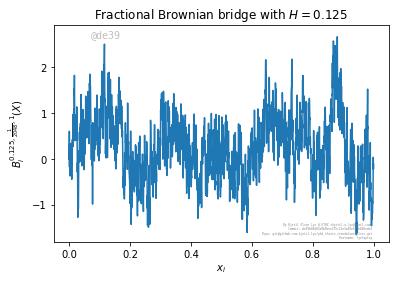

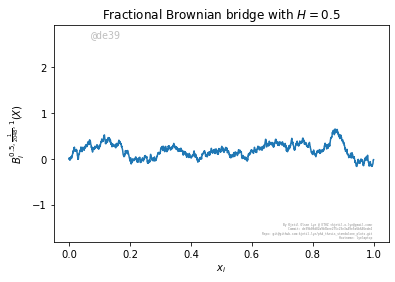

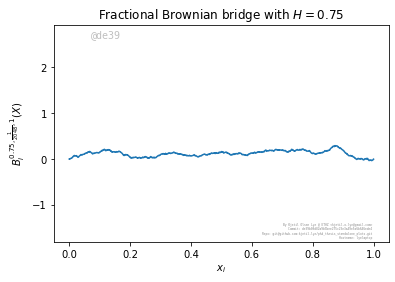

In [2]:

for H in Hurst_indices:
    
    fbb = fbmpy.fractional_brownian_bridge_1d(H, resolution, X)[:-1]
    if H == Hurst_indices[0]:
        lims = [1.1*min(fbb), 1.1*max(fbb)]
    plt.ylim(lims)
    x = np.linspace(0, 1, resolution)
    plt.plot(x, fbb)
    plt.title(f"Fractional Brownian bridge with $H={H}$")
    plt.xlabel("$x_i$")
    plt.ylabel(f"$B^{{{H}, \\frac{{1}}{{{resolution}}}, 1}}_{{i}}(X)$")
    plot_info.showAndSave(f"fbb_{H}_{resolution}_initial")

# 2D experiments

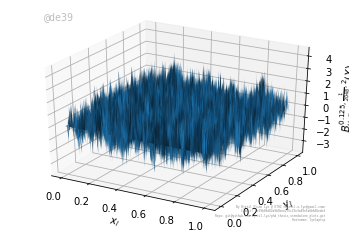

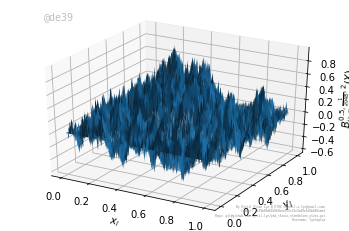

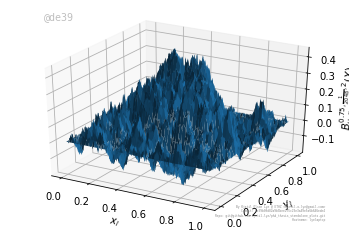

In [3]:
from mpl_toolkits.mplot3d import Axes3D
for H in Hurst_indices:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    fbb = fbmpy.fractional_brownian_bridge_2d(H, resolution, X).reshape(
        (resolution+1, resolution+1))[:-1,:-1]
    
    x, y = np.mgrid[0:1:resolution*1j,0:1:resolution*1j]
    ax.plot_surface(x, y, fbb)
    #ax.set_title(f"Fractional Brownian bridge with $H={H}$")
    ax.set_xlabel("$x_i$")
    ax.set_ylabel("$y_j$")
    ax.set_zlabel(f"$B^{{{H}, \\frac{{1}}{{{resolution}}}, 2}}_{{(i,j)}}(X)$")
    plot_info.showAndSave(f"fbb_2d_{H}_{resolution}_initial")

# 1D FBB construction

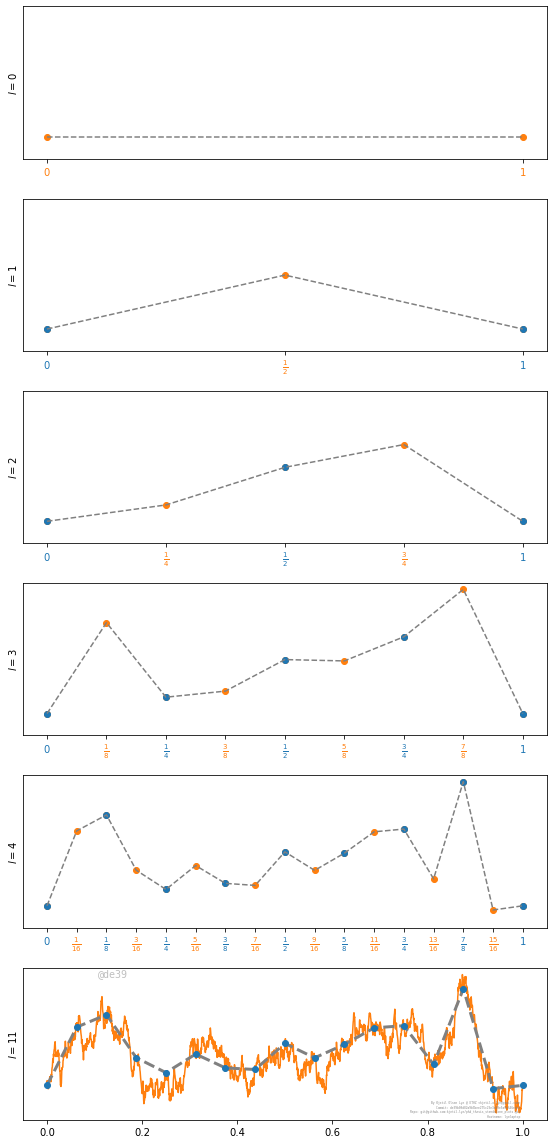

In [15]:
resolutions = [1, 2, 4, 8, 16]

fig, axes = plt.subplots(len(resolutions)+1, 1, sharex=False, figsize=(8,16))

from fractions import Fraction
def nice_fraction_string(n, m):
    fract = Fraction(n, m)
    if fract.denominator== 1:
        return f'${fract.numerator}$'
    else:
        return f'$\\frac{{{fract.numerator}}}{{{fract.denominator}}}$'


for n, r in enumerate(resolutions):
    x = np.linspace(0, 1, r+1)
    fbb = fbmpy.fractional_brownian_bridge_1d(0.5, r, X)
    #axes[n].plot(x, fbb, color='C0')
    axes[n].plot(x, fbb, 'o', color='C1')
    

    
    if n > 0:
        axes[n].plot(x[0::2], fbb[0::2], 'o', color='C0')
    axes[n].plot(x, fbb, '--', color='gray')
        
    axes[n].set_ylim([-0.1, 0.6])
    axes[n].get_yaxis().set_ticks([])
    axes[n].set_ylabel(f'$l={n}$')
    
    axes[n].set_xticks(x)
    axes[n].set_xticklabels([nice_fraction_string(n, r) for n in range(r+1)])
    
    
    for m, ticklabel in enumerate(axes[n].xaxis.get_ticklabels()):
        if r == 1:
            ticklabel.set_color("C1")
        else:
            if m % 2 == 1:
                ticklabel.set_color("C1")
            else:
                ticklabel.set_color("C0")
fig.tight_layout()

fbb_high_res = fbmpy.fractional_brownian_bridge_1d(0.5, 128*resolutions[-1], X)
x_high_res = np.linspace(0, 1, fbb_high_res.shape[0])
axes[-1].plot(x_high_res, fbb_high_res, color='C1')
axes[-1].plot(x, fbb, '--', color='gray', linewidth=3)
axes[-1].plot(x, fbb, 'o', color='C0')
axes[-1].get_yaxis().set_ticks([])
axes[-1].set_ylabel(f'$l={int(np.log2(fbb_high_res.shape[0]-1)):d}$')
plot_info.showAndSave("fbb_construction_1d")

In [5]:
print(max(fbb))
print(min(fbb))

0.5713887123502023
-0.01923091791479059
